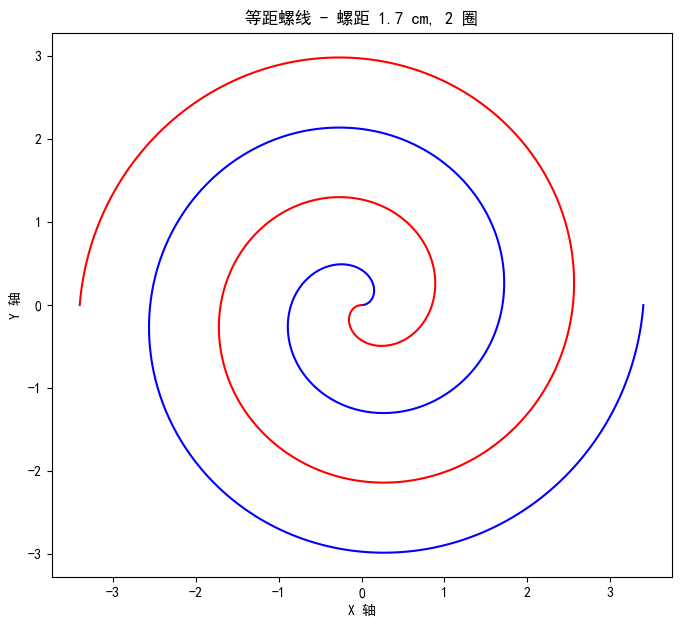

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 参数设置
pitch = 1.7 # 螺距，单位：cm
b = pitch / (2 * np.pi)  # b 参数计算
a = 0  # 起始点可以设为 0
num_turns = 2  # 圈数

# 生成角度范围（16 圈）
theta = np.linspace(0, num_turns * 2 * np.pi, 1000)

# 极坐标方程计算 r
r1 = a + b * theta
# r2 = a - b * theta
# 将极坐标转换为笛卡尔坐标
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)

x2 = r2 * np.cos(theta)
y2 = r2 * np.sin(theta)

# 绘制螺线
plt.figure(figsize=(8,8))
plt.plot(x1, y1,color= "b",label='盘入')
plt.plot(x2, y2,color= "r",label='盘出')
plt.title(f"等距螺线 - 螺距 {pitch} cm, {num_turns} 圈")
plt.xlabel("X 轴")
plt.ylabel("Y 轴")
plt.gca().set_aspect('equal', adjustable='box')  # 保持纵横比相等
# plt.grid(True)
plt.show()

# 计算theta角倍数关系

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


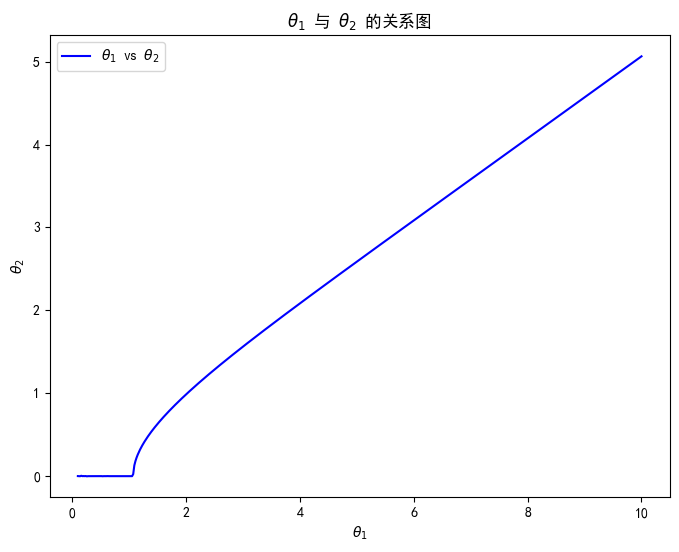

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 定义 R(theta) 函数
def R(theta):
    return (1.7 / (2 * np.pi)) * ((theta**2 + 1)**(3/2)) / (2 + theta**2)

# 定义方程组的差值函数
def equation(theta_2, theta_1):
    return 2 * R(theta_2) - R(theta_1)

# 计算 theta_1 和 theta_2 的关系
theta_1_vals = np.linspace(0.1, 10, 500)  # 避免 theta = 0
theta_2_vals = []

for theta_1 in theta_1_vals:
    # 使用 fsolve 求解 theta_2
    theta_2_solution = fsolve(equation, x0=theta_1/2, args=(theta_1))
    theta_2_vals.append(theta_2_solution[0])

# 绘制 theta_1 和 theta_2 的关系图
plt.figure(figsize=(8, 6))
plt.plot(theta_1_vals, theta_2_vals, label=r'$\theta_1$ vs $\theta_2$', color='blue')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title(r'$\theta_1$ 与 $\theta_2$ 的关系图')
plt.legend()
# plt.grid(True)
plt.show()


In [20]:
from scipy.optimize import fsolve
import numpy as np

# 定义常数
A = 1.7 / (2 * np.pi)

# 定义方程组
def equations(vars):
    theta_1, theta_2 = vars
    R1 = A * ((theta_1**2 + 1)**(3/2)) / (2 + theta_1**2)
    R2 = A * ((theta_2**2 + 1)**(3/2)) / (2 + theta_2**2)
    eq1 = R1 - 2 * R2  # 2 R2 =  * R1
    eq2 = R2 - A * ((theta_2**2 + 1)**(3/2)) / (2 + theta_2**2)  # Consistency check
    return [eq1, eq2]

# 初始猜测值
initial_guess = [1, 2]

# 求解
solution = fsolve(equations, initial_guess)
theta_1, theta_2 = solution

# 输出结果
print(f"theta_1 = {theta_1}")
print(f"theta_2 = {theta_2}")
print(f"The relation between theta_1 and theta_2 is theta_2 = {theta_2/theta_1:.9f} * theta_1")


theta_1 = 0.9857965402518757
theta_2 = 2.0
The relation between theta_1 and theta_2 is theta_2 = 2.028816209 * theta_1


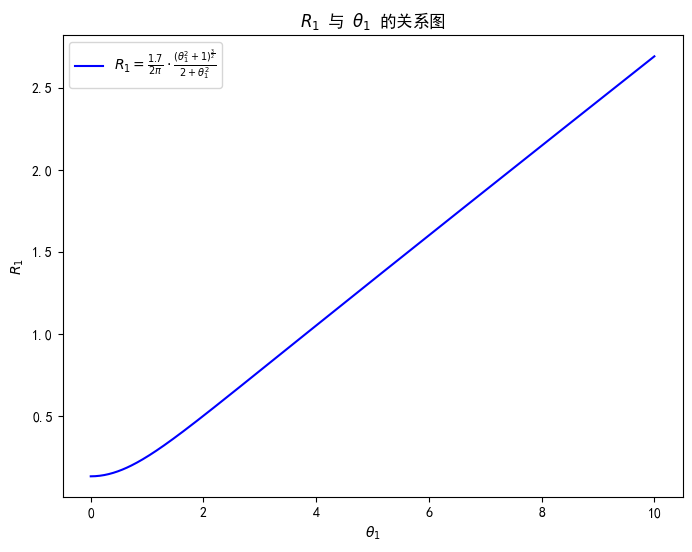

In [265]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 theta_1 的范围
theta_1 = np.linspace(0, 10, 500)  # 从 0 到 10 的 500 个点

# 根据公式计算 R_1
R_1 = (1.7 / (2 * np.pi)) * ((theta_1**2 + 1)**(3/2)) / (2 + theta_1**2)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(theta_1, R_1, label=r'$R_1 = \frac{1.7}{2\pi} \cdot \frac{(\theta_1^2 + 1)^{\frac{3}{2}}}{2 + \theta_1^2}$', color='blue')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$R_1$')
plt.title(r'$R_1$ 与 $\theta_1$ 的关系图')
plt.legend()
# plt.grid(True)
plt.show()


# 定义螺旋函数

In [60]:
import numpy as np

def C_R(theta_1):
    """
    求半径
    """
    # 定义常数
    A = 1.7 / (2 * np.pi)
    
    # 计算 R1
    R1 = A * ((theta_1**2 + 1)**(3/2)) / (2 + theta_1**2)
    return R1

In [257]:
C_R(4)

1.0535858517157672

In [24]:
0.511920760795442/0.2550896229111801

2.006827071023929

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line(x, y, angle, length=2):
    """
    绘制通过给定点 (x, y) 的短直线段（切线）。
    
    参数:
    x (float): 直线起点的 x 坐标
    y (float): 直线起点的 y 坐标
    angle (float): 直线的倾斜角（以弧度为单位）
    length (float): 直线的长度（默认值为 0.1）
    """
    # 计算直线段的终点坐标
    x_end = x + length * np.cos(angle)
    y_end = y + length * np.sin(angle)
    
    # 绘制直线
    plt.plot([x, x_end], [y, y_end], color='blue', linestyle='-', linewidth=2)
    plt.scatter([x], [y], color='red')  # 标记起点
    
def plot_circle(center, radius):
    """
    绘制以指定中心点和半径的圆。
    
    :param center: tuple, (x, y) 圆心的坐标
    :param radius: float, 圆的半径
    """
    fig, ax = plt.subplots()
    
    # 创建圆形
    circle = plt.Circle(center, radius, color='blue', fill=False)
    
    # 添加圆形到绘图
    ax.add_patch(circle)
    
    # 标记圆心
    ax.plot(center[0], center[1], 'ro')  # 圆心点显示为红色
    
    # 设置比例使得圆看起来是正圆
    ax.set_aspect('equal', 'box')

## 定义盘入螺旋函数

In [224]:
import numpy as np

def alpha_in(theta, p=1.7):
    """
    计算等距螺旋线在某个点的切线斜率并返回对应的弧度角。
    
    参数:
    theta (float): 螺旋线点的弧度角
    p (float): 螺距（默认为1.7）
    
    返回:
    slope_angle (float): 切线斜率对应的弧度角
    """
    # 计算极径 r
    r = (p / (2 * np.pi)) * theta
    
    # 计算 dr/dtheta
    dr_dtheta = p / (2 * np.pi)
    
    # 计算切线的斜率
    slope = (r * np.cos(theta) + dr_dtheta * np.sin(theta)) / (r * np.sin(theta) - dr_dtheta * np.cos(theta))
    
    # 计算切线斜率对应的弧度角
    slope_angle = np.arctan(slope)    
    return - slope_angle

def ptz_in(theta, p=1.7):
    """
    计算等距螺旋线在给定 θ 值下的直角坐标 (x, y)。
    
    参数:
    theta (float): 螺旋线点的弧度角
    p (float): 螺距（默认为1.7）
    
    返回:
    (float, float): 对应的直角坐标 (x, y)
    """
    # 计算极径 r
    r = (p / (2 * np.pi)) * theta
    
    # 将极坐标转换为直角坐标
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return x, y

def m_point_in(point, angle, radius):
    """
    计算从给定点沿指定角度和半径移动后的新点坐标。
    
    :param point: tuple, (x, y) 给定点的坐标
    :param angle: float, 角度，以弧度表示
    :param radius: float, 要移动的距离（半径）
    :return: tuple, (x', y') 新点的坐标
    """
    x, y = point
    new_x = x + radius * np.cos(angle)
    new_y = y + radius * np.sin(angle)
    return new_x, new_y

def draw_in_circle(alpha_test):
    p_x,p_y = ptz_in(alpha_test)

#     alpha_mod = alpha_test % (2 * np.pi)

    # 判断 alpha_mod 是否在 [0, π) 之间
#     if 0 <= alpha_mod < 1/2 *np.pi:
#         al = 3*np.pi / 2
#     else:
#         al = np.pi / 2
    
    o_x1,o_y1 = m_point_in(ptz_in(alpha_test),(alpha_in(alpha_test)-3*np.pi / 2) , C_R(alpha_test))
    o_x2,o_y2 = m_point_in(ptz_in(alpha_test),(alpha_in(alpha_test)- np.pi / 2) , C_R(alpha_test))

    plt.scatter(p_x,p_y,s = 25 ,color = "g",marker = 'x')
    plt.scatter(o_x1,o_y1,s = 25 ,color = "g",marker = "o")
    plt.scatter(o_x2,o_y2,s = 25 ,color = "g",marker = "o")

#     plot_line(p_x,p_y,C_R(alpha_test))

    circle1 = plt.Circle((o_x1,o_y1), C_R(alpha_test), color='g', fill=False,linewidth =0.5)
    plt.gca().add_patch(circle1)
    circle2 = plt.Circle((o_x2,o_y2), C_R(alpha_test), color='g', fill=False,linewidth =0.5)
    plt.gca().add_patch(circle2)
    
    print(f"盘入曲线切点坐标为{(p_x,p_y)}，圆形坐标为{(o_x1,o_y1)}或{(o_x2,o_y2)}")

# def draw_in_circle(alpha_test):
#     p_x,p_y = ptz_in(alpha_test)

#     alpha_mod = alpha_test % (2 * np.pi)

#     # 判断 alpha_mod 是否在 [0, π) 之间
#     if 0 <= alpha_mod < 1/2 *np.pi:
#         al = 3 *  np.pi / 2
#     else:
#         al = np.pi / 2
    
#     o_x,o_y = m_point_in(ptz_in(alpha_test),(alpha_in(alpha_test)-al) , C_R(alpha_test))

#     plt.scatter(p_x,p_y,s = 25 ,color = "g",marker = 'x')
#     plt.scatter(o_x,o_y,s = 25 ,color = "g",marker = "o")

#     plot_line(p_x,p_y,C_R(alpha_test))

#     circle2 = plt.Circle((o_x,o_y), C_R(alpha_test), color='g', fill=False)
#     plt.gca().add_patch(circle)
#     print(f"盘入曲线切点坐标为{(p_x,p_y)}，圆形坐标为{(o_x,o_y)}")

盘入曲线切点坐标为(-0.85, 1.0409497792752501e-16)，圆形坐标为(-1.6283885147914459, 0.2477687595500351)或(-0.0716114852085541, -0.24776875955003497)


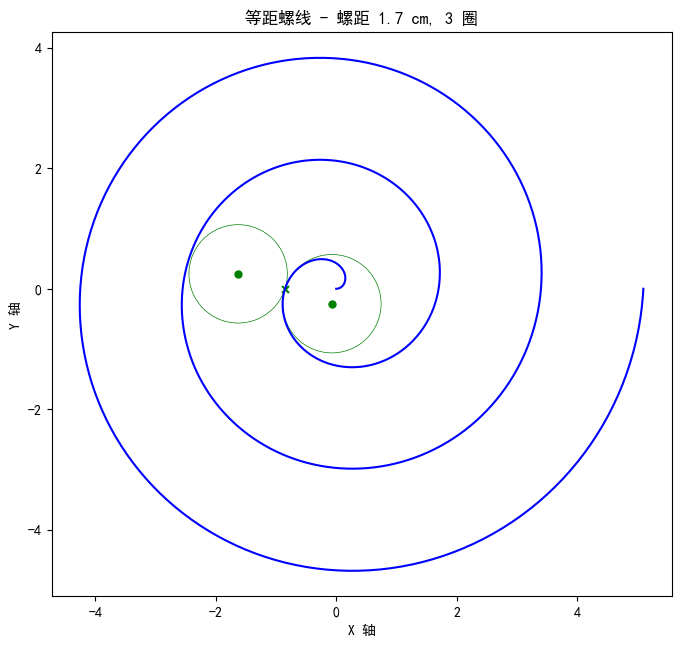

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 参数设置
pitch = 1.7 # 螺距，单位：cm
b = pitch / (2 * np.pi)  # b 参数计算
a = 0  # 起始点可以设为 0
num_turns = 3  # 圈数

# 生成角度范围（16 圈）
theta = np.linspace(0, num_turns * 2 * np.pi, 1000)

# 极坐标方程计算 r
r1 = a + b * theta
r2 = a - b * theta
# 将极坐标转换为笛卡尔坐标
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)

x2 = r2 * np.cos(theta)
y2 = r2 * np.sin(theta)

# 绘制螺线
plt.figure(figsize=(8,8))
plt.plot(x1, y1,color= "b",label='盘入')
# plt.plot(x2, y2,color= "r",label='盘出')
plt.title(f"等距螺线 - 螺距 {pitch} cm, {num_turns} 圈")

alpha_test = np.pi 
draw_in_circle(alpha_test)

plt.xlabel("X 轴")
plt.ylabel("Y 轴")
plt.gca().set_aspect('equal', adjustable='box')  # 保持纵横比相等
# plt.grid(True)
plt.show()

## 盘出曲线函数

In [225]:
import numpy as np

def alpha_out(theta, p=1.7):
    """
    计算等距螺旋线在某个点的切线斜率并返回对应的弧度角。
    
    参数:
    theta (float): 螺旋线点的弧度角
    p (float): 螺距（默认为1.7）
    
    返回:
    slope_angle (float): 切线斜率对应的弧度角
    """
    # 计算极径 r
    r = (p / (2 * np.pi)) * theta
    
    # 计算 dr/dtheta
    dr_dtheta = p / (2 * np.pi)
    
    # 计算切线的斜率
    slope = (r * np.cos(theta) + dr_dtheta * np.sin(theta)) / (r * np.sin(theta) - dr_dtheta * np.cos(theta))
    
    # 计算切线斜率对应的弧度角
    slope_angle = np.arctan(slope)    
    return  -slope_angle

def ptz_out(theta, p=1.7):
    """
    计算等距螺旋线在给定 θ 值下的直角坐标 (x, y)。
    
    参数:
    theta (float): 螺旋线点的弧度角
    p (float): 螺距（默认为1.7）
    
    返回:
    (float, float): 对应的直角坐标 (x, y)
    """
    # 计算极径 r
    r = (p / (2 * np.pi)) * theta
    
    # 将极坐标转换为直角坐标
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return -x, -y

def m_point_out(point, angle, radius):
    """
    计算从给定点沿指定角度和半径移动后的新点坐标。
    
    :param point: tuple, (x, y) 给定点的坐标
    :param angle: float, 角度，以弧度表示
    :param radius: float, 要移动的距离（半径）
    :return: tuple, (x', y') 新点的坐标
    """
    x, y = point
    new_x = x + radius * np.cos(angle)
    new_y = y + radius * np.sin(angle)
    return new_x, new_y

def draw_out_circle(alpha_test):
    p_x,p_y = ptz_out(alpha_test)

    alpha_mod = alpha_test % (2 * np.pi)

#     # 判断 alpha_mod 是否在 [0, π) 之间
#     if 0 <= alpha_mod < np.pi:
#         al = np.pi / 2
#     else:
#         al = 3 *np.pi / 2
    
    o_x1,o_y1 = m_point_out(ptz_out(alpha_test),(alpha_out(alpha_test)-np.pi / 2) , C_R(alpha_test))
    o_x2,o_y2 = m_point_out(ptz_out(alpha_test),(alpha_out(alpha_test)-3 * np.pi / 2) , C_R(alpha_test))

    plt.scatter(p_x,p_y,s = 25 ,color = "r",marker = 'x')
    plt.scatter(o_x1,o_y1,s = 25 ,color = "r",marker = "o")
    plt.scatter(o_x2,o_y2,s = 25 ,color = "r",marker = "o")

#     plot_line(p_x,p_y,C_R(alpha_test))

    circle1 = plt.Circle((o_x1,o_y1), C_R(alpha_test), color='r', fill=False,linewidth =0.5)
    plt.gca().add_patch(circle1)
    circle2 = plt.Circle((o_x2,o_y2), C_R(alpha_test), color='r', fill=False,linewidth =0.5)
    plt.gca().add_patch(circle2)
    print(f"盘出曲线切点坐标为{(p_x,p_y)}，圆形坐标为{(o_x1,o_y1)}或{(o_x2,o_y2)}")

# def draw_out_circle(alpha_test):
#     p_x,p_y = ptz_out(alpha_test)

#     alpha_mod = alpha_test % (2 * np.pi)

#     # 判断 alpha_mod 是否在 [0, π) 之间
#     if 0 <= alpha_mod < np.pi:
#         al = np.pi / 2
#     else:
#         al = 3 *np.pi / 2
    
#     o_x,o_y = m_point_out(ptz_out(alpha_test),(alpha_out(alpha_test)-al) , C_R(alpha_test))

#     plt.scatter(p_x,p_y,s = 25 ,color = "g",marker = 'x')
#     plt.scatter(o_x,o_y,s = 25 ,color = "g",marker = "o")

# #     plot_line(p_x,p_y,C_R(alpha_test))

#     circle = plt.Circle((o_x,o_y), C_R(alpha_test), color='g', fill=False)
#     plt.gca().add_patch(circle)
#     print(f"盘出曲线切点坐标为{(p_x,p_y)}，圆形坐标为{(o_x,o_y)}")

盘出曲线切点坐标为(0.85, -1.0409497792752501e-16)，圆形坐标为(1.6283885147914459, -0.2477687595500352)或(0.0716114852085541, 0.24776875955003488)


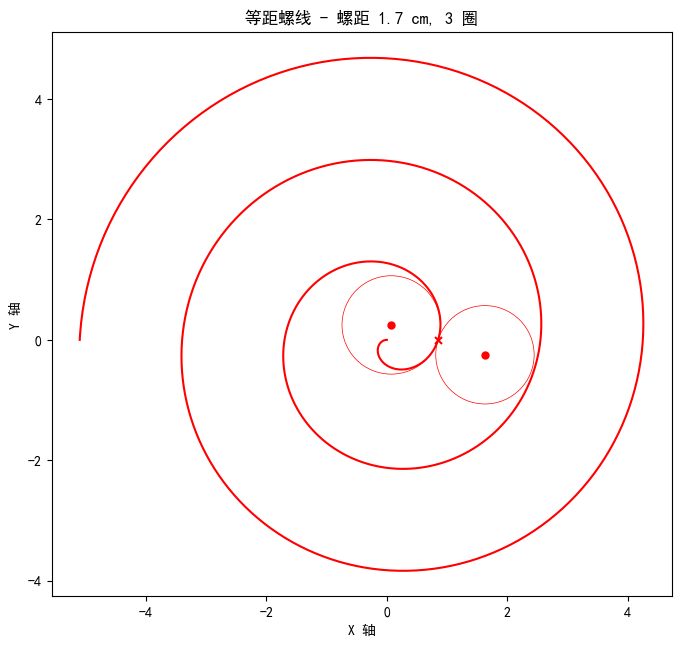

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 参数设置
pitch = 1.7 # 螺距，单位：cm
b = pitch / (2 * np.pi)  # b 参数计算
a = 0  # 起始点可以设为 0
num_turns = 3  # 圈数

# 生成角度范围（16 圈）
theta = np.linspace(0, num_turns * 2 * np.pi, 1000)

# 极坐标方程计算 r
r1 = a + b * theta
r2 = a - b * theta
# 将极坐标转换为笛卡尔坐标
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)

x2 = r2 * np.cos(theta)
y2 = r2 * np.sin(theta)

# 绘制螺线
plt.figure(figsize=(8,8))
# plt.plot(x1, y1,color= "b",label='盘入')
plt.plot(x2, y2,color= "r",label='盘出')
plt.title(f"等距螺线 - 螺距 {pitch} cm, {num_turns} 圈")

alpha_test =  np.pi
draw_out_circle(alpha_test)

plt.xlabel("X 轴")
plt.ylabel("Y 轴")
plt.gca().set_aspect('equal', adjustable='box')  # 保持纵横比相等
# plt.grid(True)
plt.show()

# 测试图像

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
def draw_in_out(alpha):
    # 设置中文字体
    rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
    rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

    # 参数设置
    pitch = 1.7 # 螺距，单位：cm
    b = pitch / (2 * np.pi)  # b 参数计算
    a = 0  # 起始点可以设为 0
#     num_turns = 10  # 圈数

    # 生成角度范围（16 圈）
    theta = np.linspace(0, alpha * 2 * np.pi, 1000)

    # 极坐标方程计算 r
    r1 = a + b * theta
    r2 = a - b * theta
    # 将极坐标转换为笛卡尔坐标
    x1 = r1 * np.cos(theta)
    y1 = r1 * np.sin(theta)

    x2 = r2 * np.cos(theta)
    y2 = r2 * np.sin(theta)

    # 绘制螺线
    plt.figure(figsize=(8,8))

    alpha_test =  alpha
    draw_in_circle(alpha_test)
    draw_out_circle(2.028816209 * alpha_test)

    plt.plot(x1, y1,color= "bisque",label='盘入',alpha = 1,linewidth =1)
    plt.plot(x2, y2,color= "k",label='盘出',alpha = 0.5,linewidth = 0.5)
#     plt.title(f"{alpha} :等距螺线 - 螺距 {pitch} cm ")
#     plt.xlabel("X 轴")
#     plt.ylabel("Y 轴")
    plt.gca().set_aspect('equal', adjustable='box')  # 保持纵横比相等
    # plt.grid(True)
    plt.show()

盘入曲线切点坐标为(1.7, -4.1637991171010006e-16)，圆形坐标为(0.040985170076049515, 0.26404041084515684)或(3.35901482992395, -0.26404041084515756)
盘出曲线切点坐标为(-3.3926097299097084, -0.6210590770097841)，圆形坐标为(-6.8130194724094215, -0.9738198343702094)或(0.02780001259000464, -0.2682983196493586)


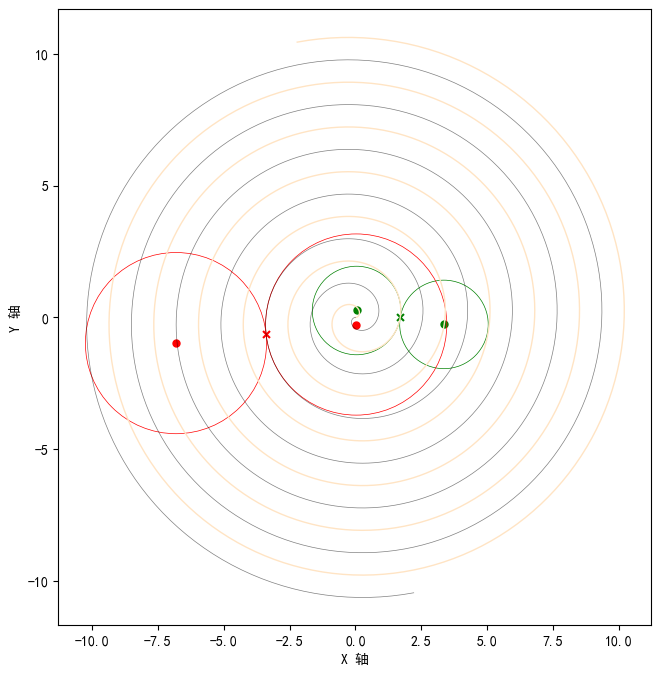

In [269]:
draw_in_out(2 *np.pi)

盘入曲线切点坐标为(-0.85, 1.0409497792752501e-16)，圆形坐标为(-1.6283885147914459, 0.2477687595500351)或(-0.0716114852085541, -0.24776875955003497)
盘出曲线切点坐标为(-1.7174320909086387, -0.1559031823624808)，圆形坐标为(-0.01640591329410168, -0.2667914330176131)或(-3.4184582685231755, -0.0450149317073487)


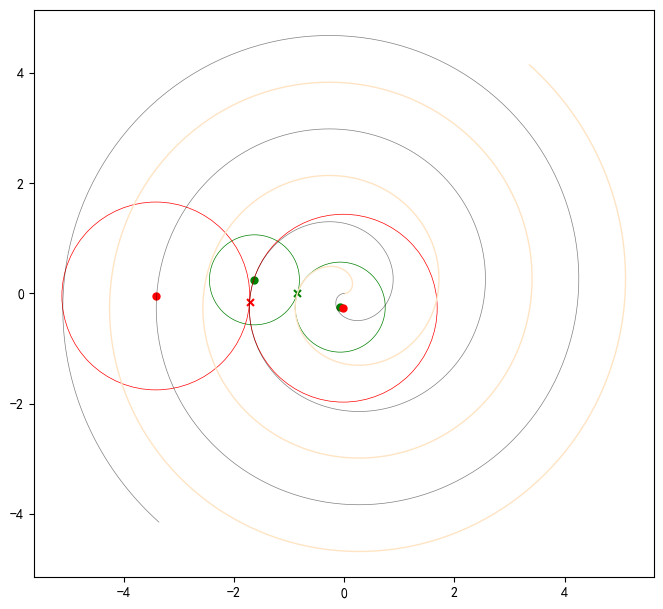

盘入曲线切点坐标为(1.7, -4.1637991171010006e-16)，圆形坐标为(0.040985170076049515, 0.26404041084515684)或(3.35901482992395, -0.26404041084515756)
盘出曲线切点坐标为(-3.3926097299097084, -0.6210590770097841)，圆形坐标为(-6.8130194724094215, -0.9738198343702094)或(0.02780001259000464, -0.2682983196493586)


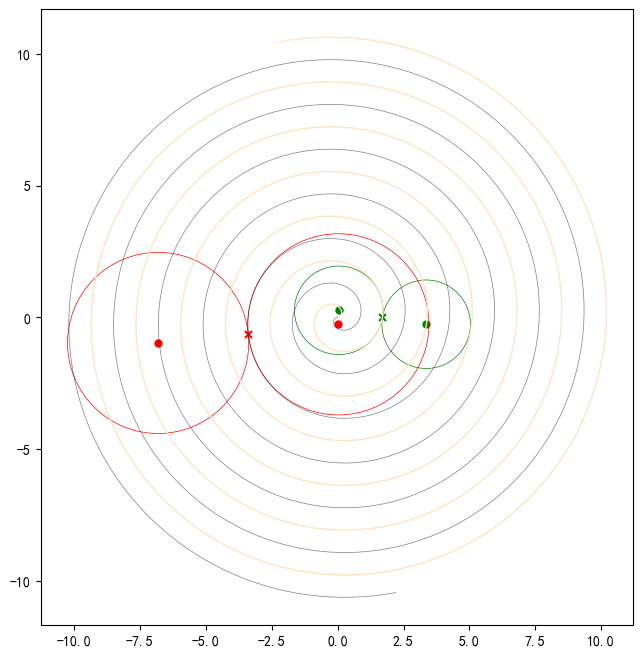

盘入曲线切点坐标为(-2.55, 9.36854801347725e-16)，圆形坐标为(-5.071924474734946, 0.26758449750566693)或(-0.028075525265054413, -0.2675844975056654)
盘出曲线切点坐标为(-4.9838553868338105, -1.3878380977295992)，圆形坐标为(-10.02653752001664, -2.5119636714318894)或(0.058826746349018855, -0.2637125240273084)


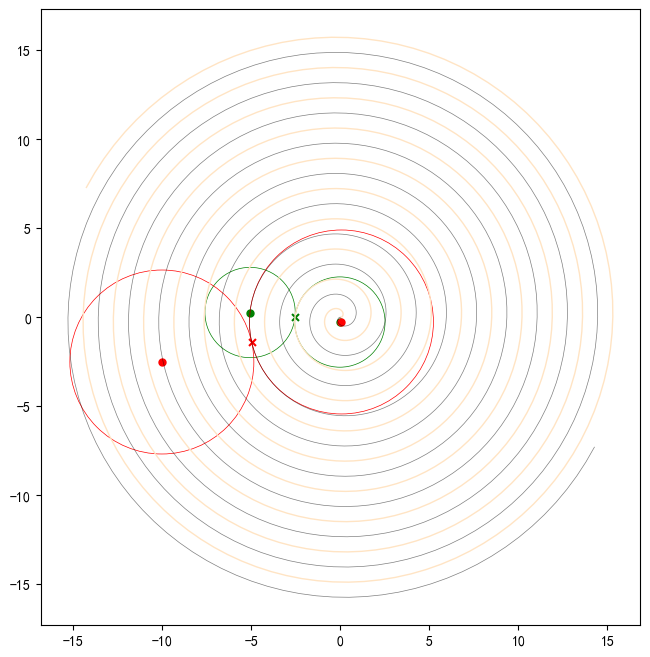

盘入曲线切点坐标为(3.4, -1.6655196468404002e-15)，圆形坐标为(0.021261471837428214, 0.26887146908605347)或(6.778738528162572, -0.26887146908605714)
盘出曲线切点坐标为(-6.450638759335381, -2.443628495294892)，圆形坐标为(-12.987084607512951, -4.630879832026886)或(0.08580708884219046, -0.25637715856289756)


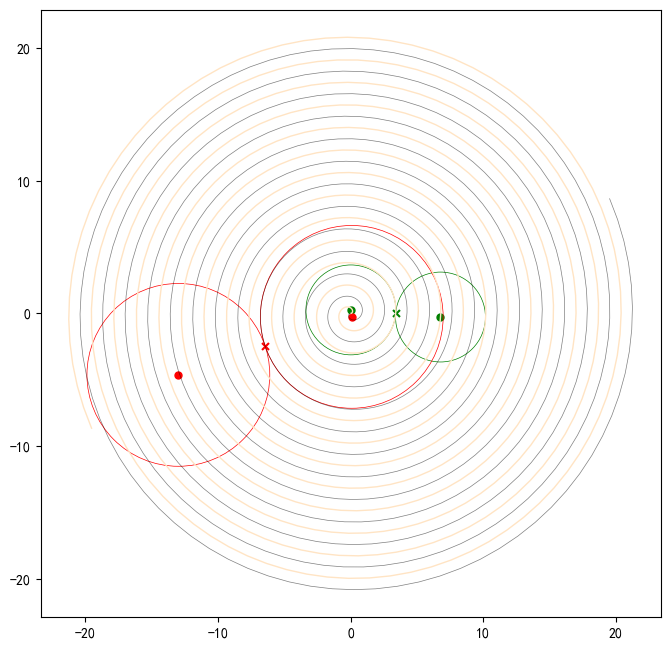

盘入曲线切点坐标为(-4.25, 2.602374448188126e-15)，圆形坐标为(-8.482913893543206, 0.269475667935908)或(-0.017086106456794425, -0.2694756679359043)
盘出曲线切点坐标为(-7.754133917339601, -3.770991503676823)，圆形坐标为(-15.618861058277762, -7.295200339095622)或(0.11059322359856072, -0.24678266825802275)


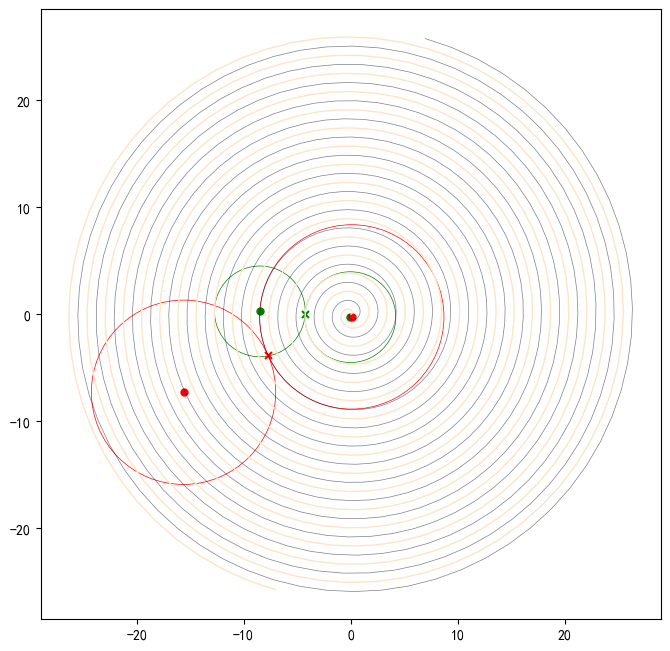

In [272]:
for i in range(5):
    
    draw_in_out((i+1)*np.pi)